<a href="https://colab.research.google.com/github/saadmarwan16/logistic_regression/blob/main/logistic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# from google.colab import files
# files.upload()

In [3]:
import sys
sys.path.insert(0, '/content/drive/MyDrive')

In [4]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from machine_learning_python.process import get_binary_data

In [5]:
X, Y = get_binary_data(read_csv('ecommerce_data.csv'))
X, Y = shuffle(X, Y)

In [6]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

In [7]:
D = X.shape[1]
w = np.random.randn(D)
b = 0

In [8]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [9]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [10]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [11]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [12]:
train_costs = list()
test_costs = list()
learning_rate = 0.001

for i in range(10000):
    pYtrain = forward(Xtrain, w, b)
    pYtest = forward(Xtest, w, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    w -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()

    if i % 1000 == 0:
        print(f"Iteration number: {i}, training cost: {ctrain}, testing_cost: {ctest}")

print(f"Final train classification_rate: {classification_rate(Ytrain, np.round(pYtrain))}")
print(f"Final train classification_rate: {classification_rate(Ytest, np.round(pYtest))}")

Iteration number: 0, training cost: 0.8137550599536472, testing_cost: 0.8204122144181928
Iteration number: 1000, training cost: 0.17460958311311042, testing_cost: 0.2132232094922136
Iteration number: 2000, training cost: 0.17329511877836865, testing_cost: 0.21337900434572624
Iteration number: 3000, training cost: 0.17317542716810425, testing_cost: 0.2137990645350584
Iteration number: 4000, training cost: 0.1731618589542915, testing_cost: 0.21397465123821424
Iteration number: 5000, training cost: 0.17316021971354945, testing_cost: 0.21403944258286356
Iteration number: 6000, training cost: 0.17316001742167078, testing_cost: 0.2140626413722856
Iteration number: 7000, training cost: 0.17315999227349121, testing_cost: 0.21407087306202408
Iteration number: 8000, training cost: 0.1731599891390886, testing_cost: 0.21407378544326336
Iteration number: 9000, training cost: 0.17315998874806962, testing_cost: 0.2140748148548527
Final train classification_rate: 0.9731543624161074
Final train classif

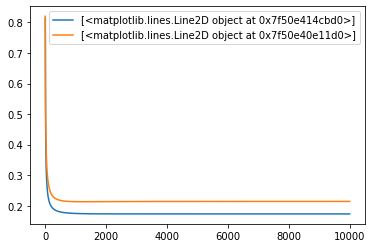

In [13]:
legend1 = plt.plot(train_costs, label='train cost')
legend2 = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show();